# Random Forest 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
y_df = pd.read_csv("yieldcurves_v2.csv", parse_dates=['Date'])

In [10]:
sp_df = pd.read_csv("SPX_500_Data.csv",parse_dates=['Date'])

In [11]:
y_df.set_index("Date", inplace = True)
sp_df.set_index("Date", inplace = True)

In [12]:
y_df.shape

(8008, 10)

In [14]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0


In [15]:
y_df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2021-12-27,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.88,0
2021-12-28,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.90,0
2021-12-29,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,1.96,0
2021-12-30,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.93,0
2021-12-31,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.90,0


In [16]:
sp_df.head()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0,0.0000,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0,0.5631,0.0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0,-0.2257,0.0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0,-0.9687,0.0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0,-0.2857,0.0


In [17]:
sp_df.tail()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
2021-09-13,4474.81,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,4447.49,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
2021-09-17,4469.74,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


In [18]:
y_df.isnull().sum()

3 Mo            4
6 Mo            1
1 Yr            1
2 Yr            1
3 Yr            1
5 Yr            1
7 Yr            1
10 Yr           1
30 Yr         995
Recession       0
dtype: int64

In [19]:
import datetime

def fill_nan_with_weekly_average(df):
  # Compute weekly averages

  monday = pd.Timestamp("1990-01-08")
  lastday = pd.Timestamp("2021-12-31")

  prev_avg = {}
  avg = {}
  while monday <= lastday:
    week = pd.date_range(monday, periods = 5, freq = "D")
    sub_df = df[week[0]:week[4]]

    for col in sub_df:
      avg[col] = sub_df[col].mean(skipna=True)
      if pd.isna(avg[col]):
        avg[col] = prev_avg[col]
      else:
        prev_avg[col] = avg[col]
      if sub_df[col].isnull().sum() != 0:
        for idx in week:
          try:
            if pd.isna(df[col].loc[idx]):
              df[col].loc[idx] = avg[col]
          except KeyError as e:
            # Must be a holiday
            pass
        
    monday = week[4] + datetime.timedelta(3
                                          )

fill_nan_with_weekly_average(y_df)

/Users/mimamirkovic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
y_df.isnull().sum()

3 Mo          0
6 Mo          0
1 Yr          0
2 Yr          0
3 Yr          0
5 Yr          0
7 Yr          0
10 Yr         0
30 Yr         0
Recession     0
dtype: int64

In [22]:
y_df["diff"] = y_df["10 Yr"] - y_df["2 Yr"]

In [23]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff
Date,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12


In [24]:
df = pd.merge(y_df, sp_df, on = ["Date"])

In [25]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,353.40,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,359.69,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,352.20,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [26]:
del df["Open"]

In [27]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


# Split Data

In [28]:
X = df.drop(columns=['Recession '])
Y = df['Recession ']

In [29]:
X_train = X["1990-01-02" : "2016-01-01"]
Y_train = Y["1990-01-02" : "2016-01-01"]

X_val = X["2016-01-02" : "2021-09-17"]
Y_val = Y["2016-01-02" : "2021-09-17"]

X_test = X["2016-01-02" : "2021-09-17"]
Y_test = Y["2016-01-02" : "2021-09-17"]

In [30]:
display(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(6497, 17)

(6497,)

(1429, 17)

(1429,)

# Fit Model and Predict

In [24]:
m = RandomForestClassifier(n_estimators=200, criterion='gini')
m.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
Y_pred = m.predict(X_test)

# Accuracy, Feature Scores, CLF Report, & CF Matrix

In [26]:
accuracy_score(Y_pred, Y_test)

0.9566130160951715

In [28]:
Y_pred_train = m.predict(X_train)

In [58]:
accuracy_score(Y_train, Y_pred_train)

1.0

In [73]:
feature_scores = pd.Series(m.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Volume                 0.108178
6 Mo                   0.096429
diff                   0.089789
30 Yr                  0.080547
High                   0.077882
3 Mo                   0.077300
1 Yr                   0.065463
Close                  0.061669
Adj Close              0.060748
Low                    0.055642
2 Yr                   0.052833
3 Yr                   0.038720
7 Yr                   0.036393
10 Yr                  0.036156
% Price Variation      0.029519
5 Yr                   0.028940
% Gain/Loss (Close)    0.003790
dtype: float64

In [96]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1367
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1429
   macro avg       0.48      0.50      0.49      1429
weighted avg       0.92      0.95      0.93      1429



In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1364    3]
 [  62    0]]

True Positives(TP) =  1364

True Negatives(TN) =  0

False Positives(FP) =  3

False Negatives(FN) =  62


<AxesSubplot:>

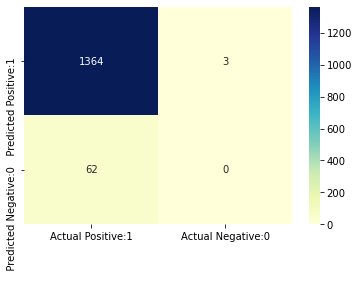

In [98]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predicted Positive:1', 'Predicted Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')